<a href="https://colab.research.google.com/github/AbhaySrivastava26/GenAi/blob/master/autoencoderDecoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np


In [7]:
(x_train,_),(x_test,_)=tf.keras.datasets.mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)


In [12]:
encoder=models.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Conv2D(32,(3,3),activation='relu',strides=2,padding='same'),
    layers.Conv2D(64,(3,3),activation='relu',strides=2,padding='same'),
    layers.Flatten(),
    layers.Dense(64,activation='relu')

])
decoder=models.Sequential([
    layers.InputLayer(input_shape=(64,)),
    layers.Dense(7*7*64,activation='relu'),
    layers.Reshape((7,7,64)),
    layers.Conv2DTranspose(64,(3,3),activation='relu',strides=2,padding='same'),
    layers.Conv2DTranspose(32,(3,3),activation='relu',strides=2,padding='same' ),
    layers.Conv2DTranspose(1,(3,3),activation='sigmoid',padding='same')
])

In [13]:
autoencoder=models.Sequential([encoder,decoder])
autoencoder.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
decoder.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 3136)           │       203,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
autoencoder.fit(x_train, x_train, epochs=2, batch_size=  128,  validation_data=(x_test, x_test))

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 133ms/step - accuracy: 0.8149 - loss: 0.0754 - val_accuracy: 0.8144 - val_loss: 0.0691
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.8149 - loss: 0.0695 - val_accuracy: 0.8144 - val_loss: 0.0685


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


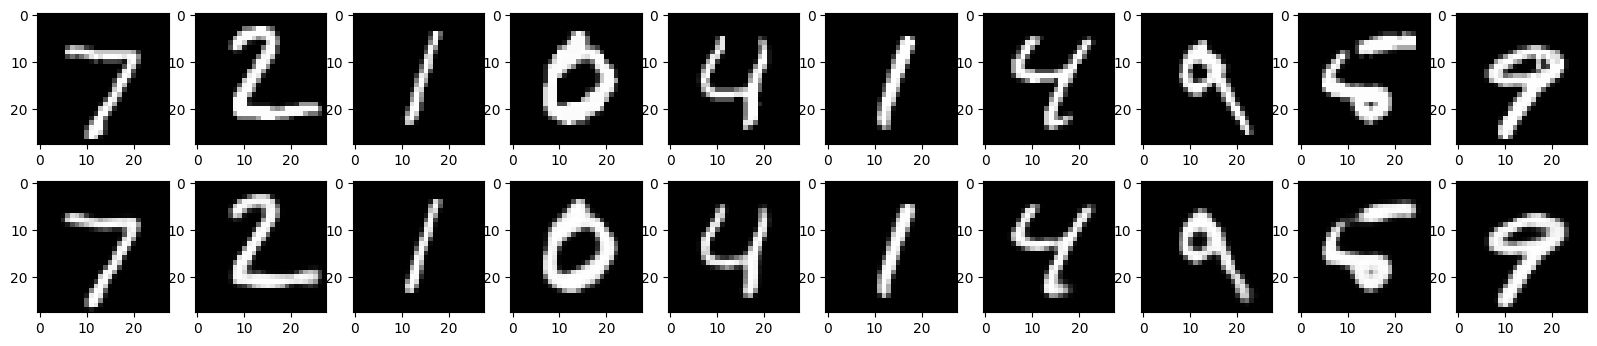

In [20]:
decoder_images=autoencoder.predict(x_test)
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.gray()
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoder_images[i].reshape(28,28),cmap='gray')
  ax=plt.subplot(2,n,i+1+n)
